In [1]:
import numpy as np
import matplotlib.pyplot as plt
import SpectralSynthesis as SS

In [2]:
X = SS.fBm(300,E = 2, H=0.5, sigma = 0.5, Seed = 120)

C:\Users\C1764397\Workshop\PhD\Scripts\SpectralSynthesis.py:57: RuntimeWarning: divide by zero encountered in power
  rad = np.where(k>0.0,k**(-(beta*0.5)),0.0)


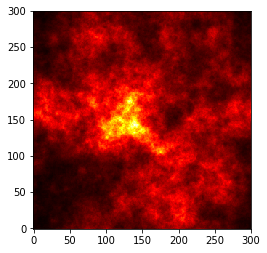

In [3]:
plt.imshow(X, cmap ='hot', origin = 'lower')
plt.show()

In [4]:
import DeltaVar as DV

In [10]:
L = np.linspace(0.7,702,50)
v = 1.5
print(len(L))

50


In [11]:
sigma_d = []
for i in range(0,50):
    sigma_d.append(DV.DeltaVar(X,L[i],v))
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [12]:
print(sigma_d)

[0.080651404263765922, 0.081021488628002583, 0.081111865537121255, 0.081129660678585888, 0.081136020663800823, 0.081138996199591862, 0.081140623193343087, 0.081141608590017206, 0.08114225020794133, 0.081142691169755379, 0.081143007188513083, 0.08114324136537962, 0.081143419700772365, 0.081143558634154775, 0.081143668972369964, 0.081143758056226506, 0.081143831013676879, 0.081143891514557448, 0.081143942241229214, 0.081143985191073423, 0.081144021876164749, 0.081144053458178808, 0.081144080841500543, 0.081144104738705092, 0.081144125717361543, 0.081144144234079216, 0.081144160659527745, 0.081144175297165666, 0.081144188397340014, 0.081144200168061731, 0.08114421078332118, 0.081144220389541361, 0.081144229110677743, 0.081144237052211368, 0.081144244304359597, 0.081144250944675936, 0.081144257040095896, 0.081144262648640428, 0.081144267820817031, 0.081144272600747358, 0.081144277027113854, 0.081144281133947588, 0.081144284951279816, 0.081144288505701864, 0.081144291820788264, 0.0811442949

In [13]:
log_sigma_d = np.log10(sigma_d)
log_L = np.log10(L)

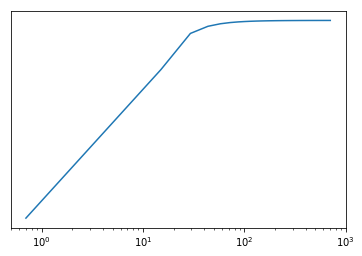

In [14]:
plt.loglog(L,sigma_d)
plt.show()